In [2]:
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
from scipy.stats import pearsonr

from scipy.cluster.hierarchy import linkage
import scipy.spatial.distance as ssd

import seaborn as sns
import sys
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_selection import mutual_info_classif
import os
# from cnmf import cNMF, save_df_to_npz, load_df_from_npz
import harmonypy
from adjustText import adjust_text

from matplotlib.patches import Patch
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.patches import Rectangle
from matplotlib.pyplot import rc_context

In [8]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [11]:
starCAT_usage = pd.read_csv("Output\starCAT_cd34_usage.rf_usage_normalized_uned.txt", sep = '\t', index_col = 0, header = 0)
starCAT_usage

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
BM1_bcBSQM,3.677671e-02,2.636874e-02,1.242303e-02,4.617509e-01,1.340358e-06,1.666028e-11,1.556348e-05,9.910415e-08,1.150016e-06,1.279033e-08,...,0.065120,1.793926e-01,6.762988e-10,2.390596e-05,1.637229e-02,1.006177e-02,1.094188e-02,0.030933,1.797462e-04,2.310557e-07
BM1_bcCHLB,1.032970e-02,2.510219e-03,1.413848e-07,4.309305e-01,1.696970e-07,4.161671e-05,2.053958e-02,1.170341e-02,1.650429e-02,1.726620e-02,...,0.003412,4.582433e-02,9.741557e-08,5.090886e-07,7.201078e-03,1.587102e-02,2.597822e-02,0.212741,5.046561e-08,2.185356e-05
BM1_bcFZFC,6.093162e-02,6.394398e-04,6.040270e-03,3.907690e-01,2.075728e-05,2.228542e-08,1.514527e-07,7.920502e-03,4.753657e-02,5.530346e-03,...,0.008689,6.090664e-02,3.320095e-04,3.572867e-04,1.372902e-02,2.939451e-04,1.172360e-02,0.139822,9.442738e-03,8.634889e-05
BM1_bcGZEW,4.409884e-02,3.056242e-02,4.078245e-05,5.137985e-01,4.038946e-07,2.222373e-05,2.253429e-07,9.068392e-03,3.150593e-02,5.660615e-08,...,0.009764,1.123790e-01,2.299682e-06,1.228424e-08,1.950741e-03,9.109432e-13,4.730848e-02,0.001551,4.945196e-06,5.963787e-02
BM1_bcFMRM,3.974472e-02,6.799438e-04,1.954722e-06,2.964830e-01,2.882646e-04,3.702672e-08,3.825991e-06,1.227958e-11,1.951676e-06,9.520846e-08,...,0.003766,1.032901e-01,4.352285e-03,2.116075e-04,8.757741e-03,5.000295e-05,5.145191e-02,0.185155,1.248822e-05,1.502979e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samp26_bcDOUR,2.103140e-13,1.648728e-04,1.125409e-04,1.899038e-01,2.288984e-13,1.552219e-07,1.245927e-05,2.756994e-05,1.493659e-03,1.049002e-02,...,0.358503,3.666500e-02,1.303619e-01,6.937848e-11,6.363262e-06,1.408679e-25,1.036048e-05,0.067240,3.114508e-07,8.727508e-07
Samp26_bcFXTL,2.031784e-12,1.341205e-02,1.688693e-04,3.515361e-06,1.382721e-11,6.626845e-05,3.437750e-02,1.388167e-03,1.171927e-01,2.228556e-11,...,0.087626,8.716278e-02,2.140811e-02,2.942044e-14,1.303178e-14,7.835133e-06,3.852680e-03,0.094646,6.005094e-11,7.078572e-03
Samp26_bcBAMF,3.543679e-09,8.521772e-04,1.081230e-07,9.677583e-10,2.475209e-02,1.524602e-12,4.021217e-18,3.105985e-13,2.091143e-02,9.441815e-04,...,0.187594,4.475743e-12,3.627175e-03,6.756378e-03,9.628452e-10,7.478393e-05,1.280222e-01,0.426385,2.383887e-12,5.001170e-04
Samp26_bcFDMD,2.831554e-01,2.540906e-11,8.400288e-15,4.651272e-15,5.406218e-11,2.587240e-11,1.352682e-10,5.184193e-15,1.475159e-11,1.860002e-02,...,0.000003,4.726653e-02,1.965248e-10,4.655864e-16,4.354013e-11,5.170437e-10,7.795859e-03,0.448891,3.148656e-13,1.511544e-11


In [12]:
cNMF_usage = pd.read_csv("cNMF4.usages.k_35.dt_0_15.consensus.txt", sep = '\t', index_col = 0, header = 0)
cNMF_usage

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,9.941066,7.260921,3.371190,125.562524,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,17.682238,48.595460,0.000000,0.000000,3.955369,2.747324,0.000000,8.490743,0.000000,0.000000
1,3.385921,0.000000,0.000000,138.284587,0.000000,0.0,6.527998,3.731253,5.249676,5.485752,...,0.000000,13.668269,0.000000,0.000000,0.706867,5.087958,5.798068,70.375836,0.000000,0.000000
2,17.131093,0.000000,1.650315,108.646418,0.000000,0.0,0.000000,2.185833,13.036276,1.505096,...,0.586828,16.043366,0.000000,0.012669,2.872405,0.000000,0.000000,40.924850,2.587133,0.000000
3,10.196783,7.091310,0.000000,116.124569,0.000000,0.0,0.000000,2.052106,7.135822,0.000000,...,0.933778,25.496192,0.000000,0.000000,0.000000,0.000000,9.795166,0.000000,0.000000,13.445612
4,10.558019,0.000000,0.000000,77.049985,0.014372,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,26.073174,0.000000,0.000000,0.813222,0.000000,11.509362,49.045850,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58035,0.000000,0.000000,0.000000,7.207598,0.000000,0.0,0.000000,0.000000,0.000000,0.387891,...,13.369509,1.238281,4.864085,0.000000,0.000000,0.000000,0.000000,2.942504,0.000000,0.000000
58036,0.000000,0.491414,0.000000,0.000000,0.000000,0.0,1.574776,0.062313,5.371941,0.000000,...,4.012841,3.981977,0.972159,0.000000,0.000000,0.000000,0.000000,4.560016,0.000000,0.322024
58037,0.000000,0.000000,0.000000,0.000000,1.746458,0.0,0.000000,0.000000,1.483488,0.060634,...,13.213483,0.000000,0.190599,0.475592,0.000000,0.000000,9.023232,30.147166,0.000000,0.000000
58038,11.315127,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.741954,...,0.000000,1.882846,0.000000,0.000000,0.000000,0.000000,0.137968,18.008724,0.000000,0.000000


In [18]:
corr_starCAT = starCAT_usage.corr()
corr_starCAT

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
1,1.000000,-0.027222,-0.015799,-0.108425,-0.017386,-0.012703,-0.015424,-0.017777,-0.036592,-0.009141,...,-0.062424,-0.060946,-0.066674,-0.016230,0.008025,-0.029798,-0.099874,-0.122707,-0.012165,-0.009056
2,-0.027222,1.000000,0.006020,-0.101968,0.007447,0.000802,0.003216,-0.001636,-0.013753,0.007777,...,-0.077765,-0.067709,-0.050681,0.003479,0.016691,0.017249,0.005592,-0.037397,0.004537,0.003256
3,-0.015799,0.006020,1.000000,-0.044565,0.003009,-0.001956,-0.002912,-0.002532,0.012281,0.002148,...,-0.023506,-0.004349,-0.009666,-0.001655,0.003513,0.002534,-0.021743,0.001068,-0.002374,-0.002430
4,-0.108425,-0.101968,-0.044565,1.000000,-0.043026,-0.030601,-0.037157,-0.041472,-0.071009,-0.050857,...,-0.201809,-0.100303,0.113420,-0.032477,-0.143685,-0.066863,-0.022382,-0.384849,-0.030996,-0.026041
5,-0.017386,0.007447,0.003009,-0.043026,1.000000,0.003687,0.000207,0.013311,0.012752,0.003686,...,0.005467,0.005689,-0.017386,-0.000503,-0.003661,0.027174,0.000839,0.025799,-0.000328,-0.001223
6,-0.012703,0.000802,-0.001956,-0.030601,0.003687,1.000000,0.000331,-0.002972,0.013125,0.008333,...,-0.020832,-0.000763,-0.013454,-0.002034,-0.007939,-0.000886,0.024161,0.006710,0.001657,-0.002136
7,-0.015424,0.003216,-0.002912,-0.037157,0.000207,0.000331,1.000000,-0.004544,-0.004061,0.001008,...,-0.020489,0.013247,-0.008923,-0.002636,0.004415,-0.001359,-0.021935,-0.002438,0.001267,-0.006024
8,-0.017777,-0.001636,-0.002532,-0.041472,0.013311,-0.002972,-0.004544,1.000000,0.007229,-0.000945,...,-0.025920,0.018897,-0.011211,0.022590,-0.004148,0.004827,-0.019849,-0.002970,-0.002334,-0.004849
9,-0.036592,-0.013753,0.012281,-0.071009,0.012752,0.013125,-0.004061,0.007229,1.000000,0.001914,...,-0.064125,-0.034143,0.039587,-0.005335,-0.029583,0.040528,-0.049141,-0.014942,0.001319,0.005259
10,-0.009141,0.007777,0.002148,-0.050857,0.003686,0.008333,0.001008,-0.000945,0.001914,1.000000,...,-0.016326,0.013888,-0.019793,0.000532,0.003454,0.009632,-0.024729,0.005004,0.001422,-0.001808


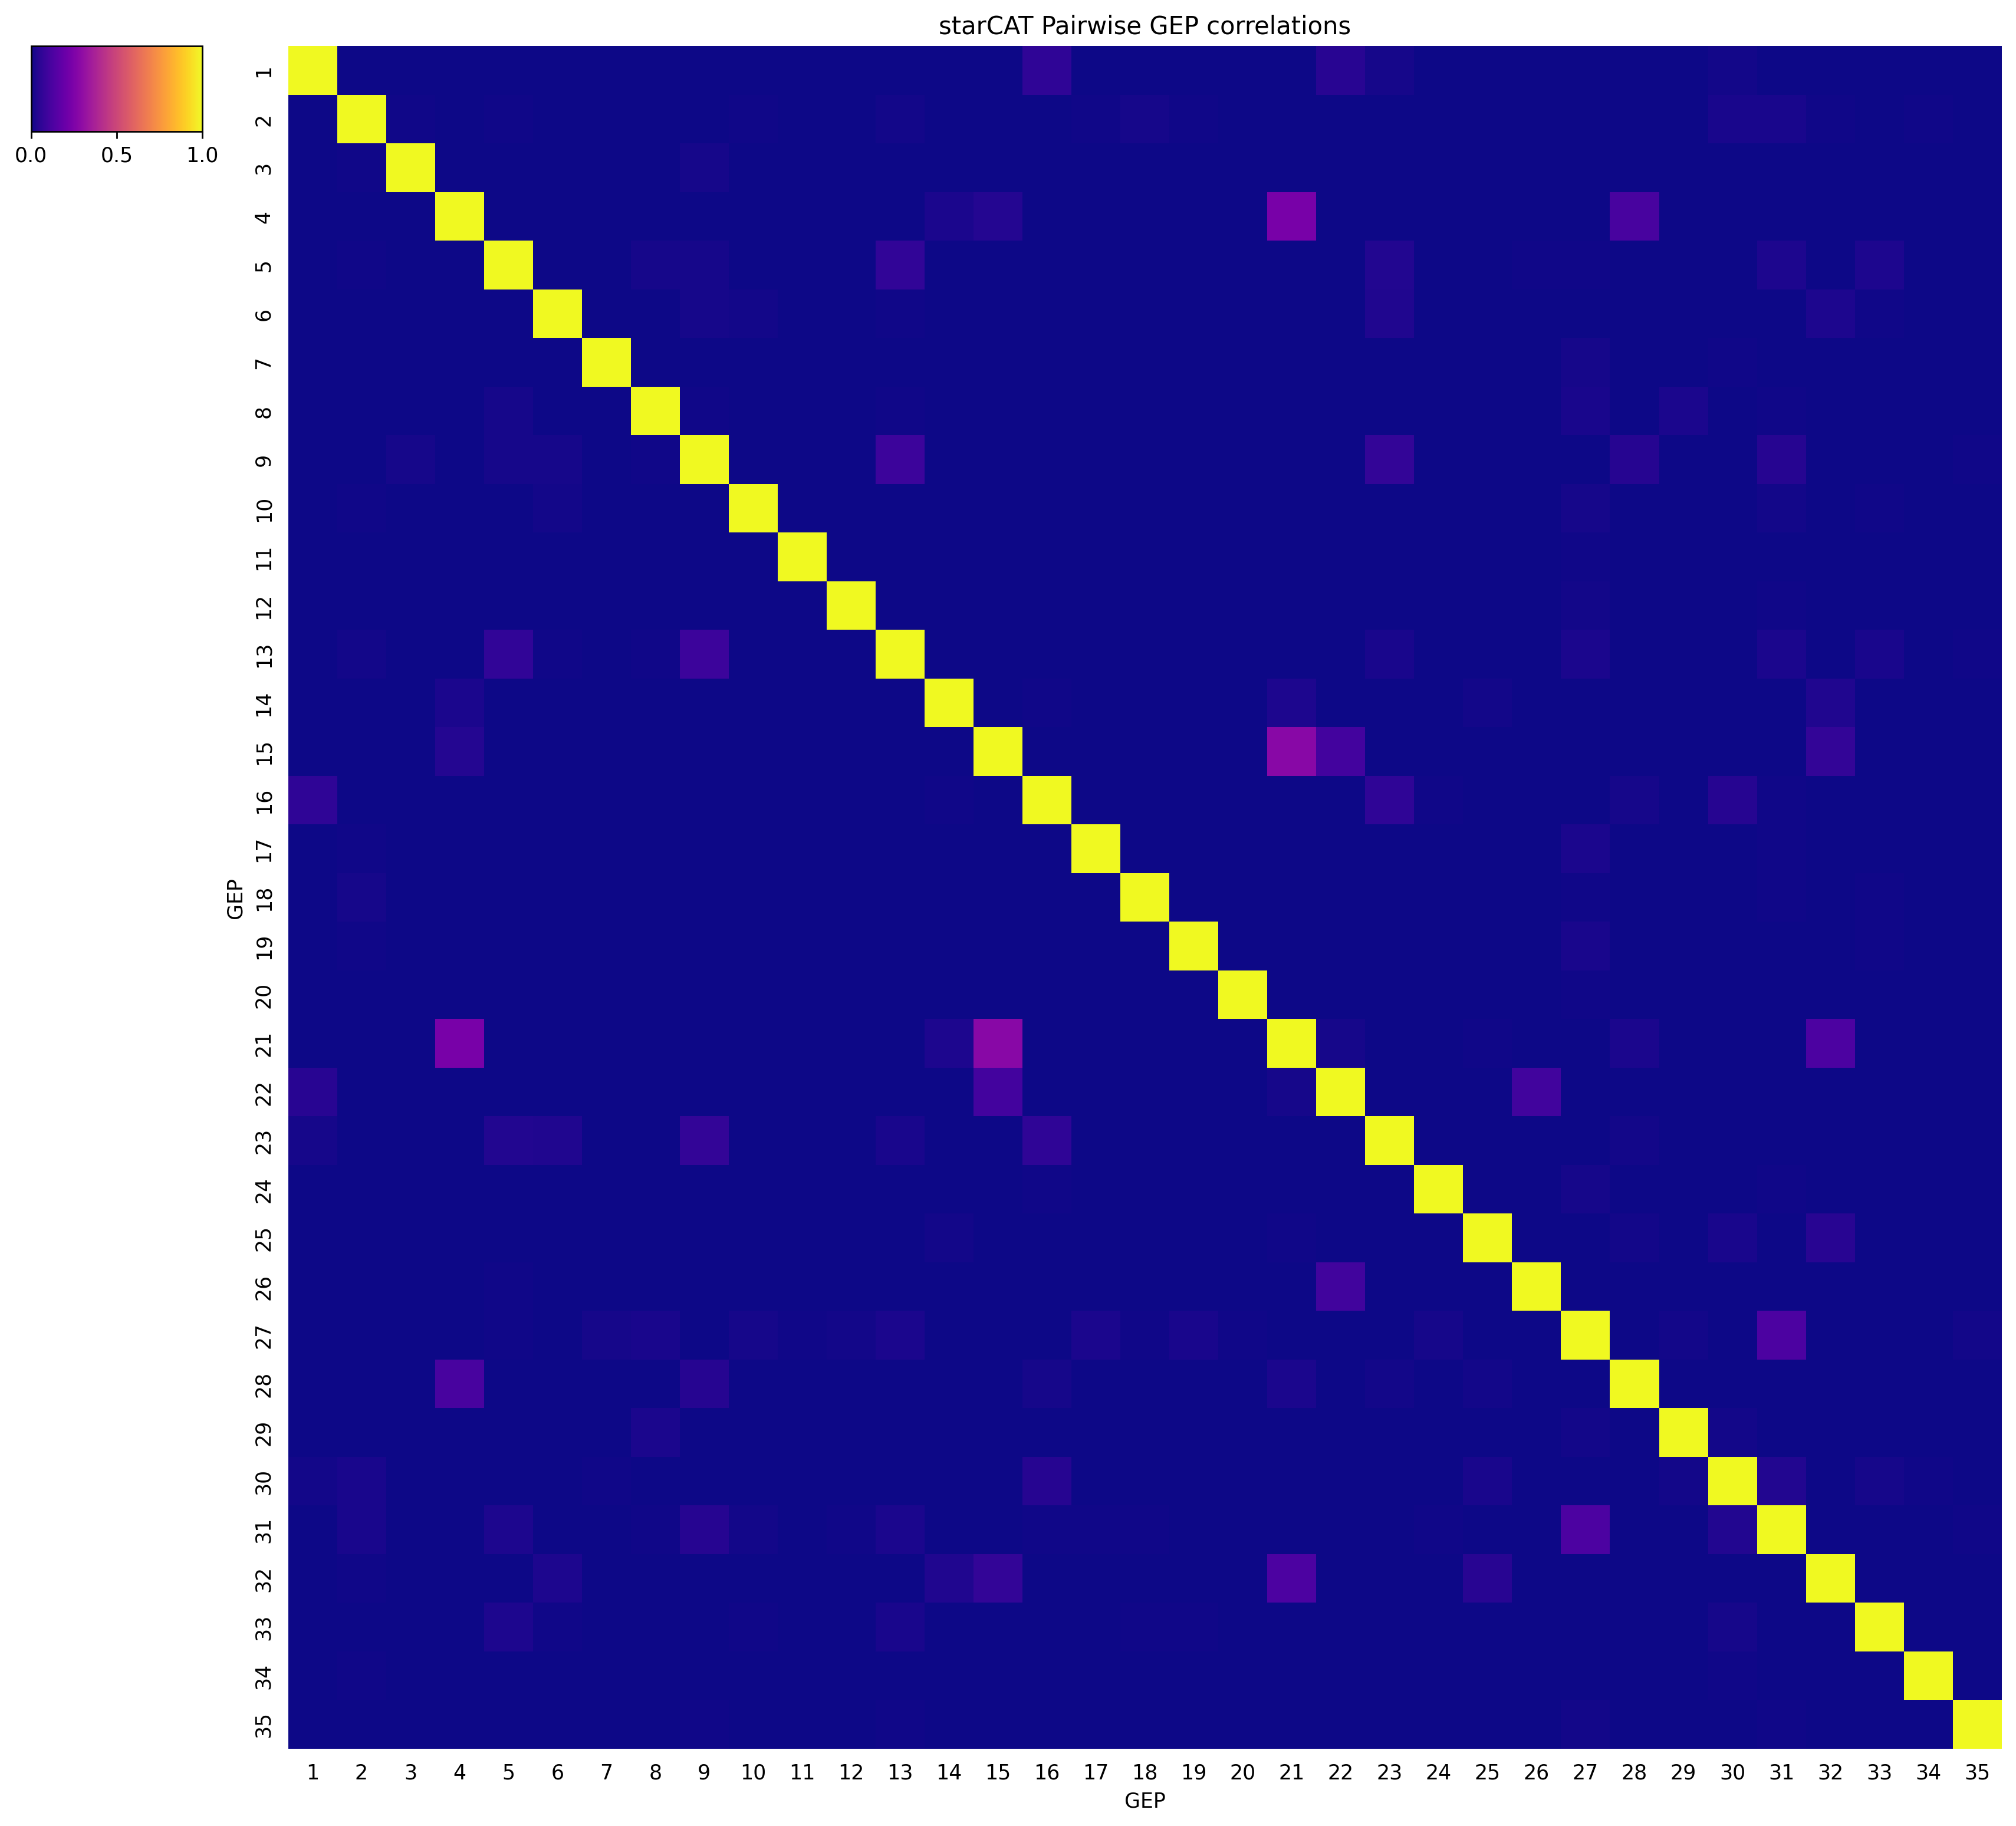

In [27]:
fig, ax = plt.subplots(dpi = 250, figsize = (15, 15))
sns.heatmap(corr_starCAT, vmin = 0, vmax = 1, cbar=False, cmap = 'plasma')
ax.set_xlabel('GEP')
ax.set_ylabel('GEP')
ax.set_title('starCAT Pairwise GEP correlations')
ax.tick_params(left=False, bottom=False)
cax = ax.inset_axes([-.15, .95, 0.1, 0.05], transform=ax.transAxes)
fig.colorbar(ScalarMappable(norm=Normalize(vmin=0, vmax=1), 
                            cmap=sns.color_palette("plasma", as_cmap=True)),
             ax=ax, cax=cax, orientation='horizontal')

In [19]:
corr_cNMF = cNMF_usage.corr()
corr_cNMF

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
1,1.000000,0.025123,0.005816,-0.004616,0.002067,-0.002357,0.014315,0.016059,0.004812,0.019032,...,0.015191,-0.007322,0.041058,0.004045,0.134568,0.026497,-0.033189,0.053362,0.008733,0.014714
2,0.025123,1.000000,0.025470,-0.003146,0.005146,0.007009,0.026825,0.043858,0.015845,0.030300,...,-0.025144,-0.026268,0.003232,0.017841,0.080507,0.072715,0.122551,0.074316,0.022673,0.017482
3,0.005816,0.025470,1.000000,-0.015823,0.001465,0.002636,0.007650,0.009229,0.051083,0.011558,...,-0.003682,0.022352,0.027400,0.006722,0.033776,0.014108,0.013398,0.072935,0.004096,0.006893
4,-0.004616,-0.003146,-0.015823,1.000000,-0.006587,-0.011118,-0.008756,-0.006452,-0.033776,-0.016416,...,-0.093094,-0.114720,0.180540,-0.009487,0.030352,-0.021421,0.102392,-0.112980,-0.008696,0.007045
5,0.002067,0.005146,0.001465,-0.006587,1.000000,0.016004,0.002193,0.005085,0.005072,0.001069,...,-0.002584,0.002602,0.002215,0.002938,0.006382,0.015778,0.007188,0.032520,0.002514,0.000357
6,-0.002357,0.007009,0.002636,-0.011118,0.016004,1.000000,0.004265,0.001534,0.014571,0.008400,...,-0.006325,-0.000663,0.003744,0.000780,0.002512,0.003979,0.036770,0.021376,0.001632,0.001029
7,0.014315,0.026825,0.007650,-0.008756,0.002193,0.004265,1.000000,0.009664,0.017842,0.011716,...,0.002284,0.041927,0.038214,0.007206,0.036412,0.019293,0.011123,0.075079,0.015391,0.005206
8,0.016059,0.043858,0.009229,-0.006452,0.005085,0.001534,0.009664,1.000000,0.020802,0.012007,...,0.000652,0.042593,0.050960,0.030624,0.044850,0.024288,0.024867,0.086616,0.004971,0.006296
9,0.004812,0.015845,0.051083,-0.033776,0.005072,0.014571,0.017842,0.020802,1.000000,0.016951,...,-0.027345,-0.002789,0.077482,0.009454,0.008534,0.075964,0.001034,0.096667,0.015696,0.017208
10,0.019032,0.030300,0.011558,-0.016416,0.001069,0.008400,0.011716,0.012007,0.016951,1.000000,...,-0.002696,0.035321,0.031353,0.009832,0.032634,0.036885,0.008885,0.075014,0.004708,0.005858


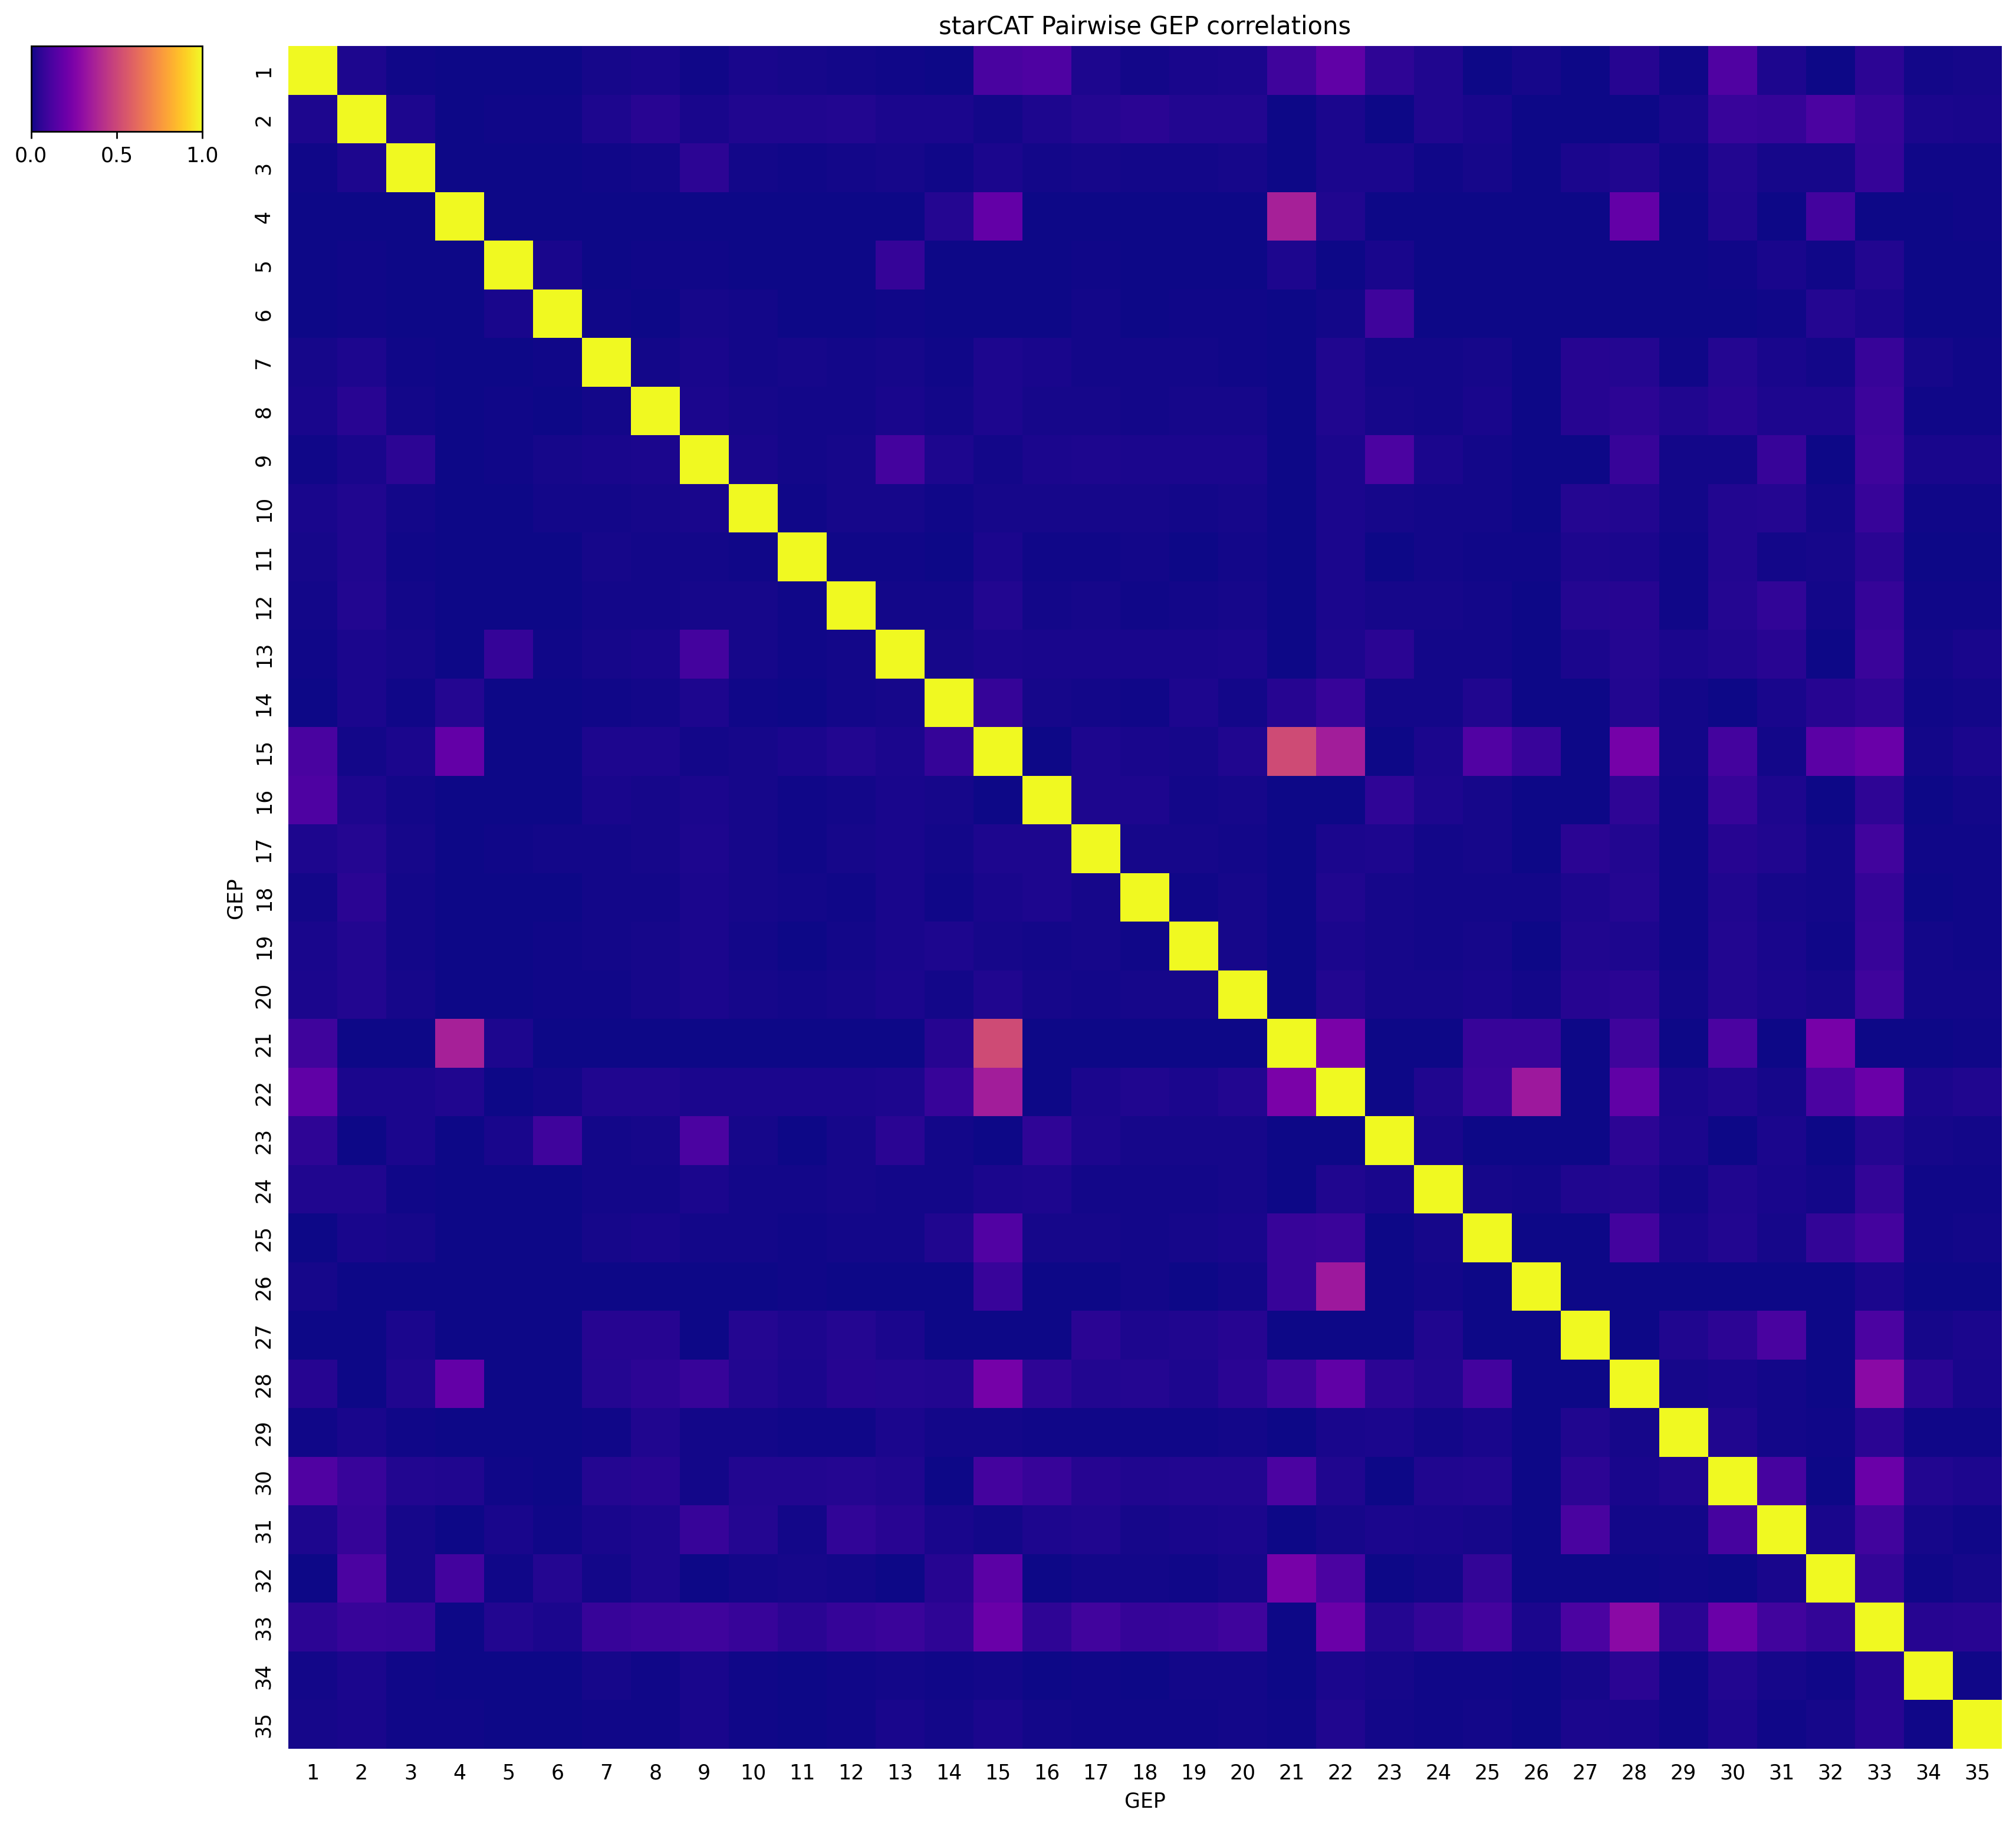

In [25]:
fig, ax = plt.subplots(dpi = 250, figsize = (15, 15))
sns.heatmap(corr_cNMF, vmin = 0, vmax = 1, cbar=False, cmap = 'plasma')
ax.set_xlabel('GEP')
ax.set_ylabel('GEP')
ax.set_title('starCAT Pairwise GEP correlations')
ax.tick_params(left=False, bottom=False)
cax = ax.inset_axes([-.15, .95, 0.1, 0.05], transform=ax.transAxes)
fig.colorbar(ScalarMappable(norm=Normalize(vmin=0, vmax=1), 
                            cmap=sns.color_palette("plasma", as_cmap=True)),
             ax=ax, cax=cax, orientation='horizontal')

In [ ]:
corr_starCAT_test = np.corrcoef(starCAT_usage, rowvar=False)
corr_cNMF_test = np.corrcoef(cNMF_usage, rowvar=False)

corr_diff = np.abs(corr_starCAT_test - corr_cNMF_test)

array([[2.22044605e-16, 5.23451313e-02, 2.16146111e-02, ...,
        1.76068667e-01, 2.08975630e-02, 2.37698056e-02],
       [5.23451313e-02, 1.11022302e-16, 1.94506813e-02, ...,
        1.11712999e-01, 1.81351415e-02, 1.42262491e-02],
       [2.16146111e-02, 1.94506813e-02, 0.00000000e+00, ...,
        7.18673102e-02, 6.46942259e-03, 9.32366536e-03],
       ...,
       [1.76068667e-01, 1.11712999e-01, 7.18673102e-02, ...,
        0.00000000e+00, 4.29269971e-02, 4.77773683e-02],
       [2.08975630e-02, 1.81351415e-02, 6.46942259e-03, ...,
        4.29269971e-02, 0.00000000e+00, 4.50692434e-03],
       [2.37698056e-02, 1.42262491e-02, 9.32366536e-03, ...,
        4.77773683e-02, 4.50692434e-03, 0.00000000e+00]])

In [29]:
corr_starCAT_test

array([[ 1.00000000e+00, -2.72219943e-02, -1.57990235e-02, ...,
        -1.22706936e-01, -1.21647100e-02, -9.05564279e-03],
       [-2.72219943e-02,  1.00000000e+00,  6.01953683e-03, ...,
        -3.73968222e-02,  4.53748050e-03,  3.25594895e-03],
       [-1.57990235e-02,  6.01953683e-03,  1.00000000e+00, ...,
         1.06792371e-03, -2.37376210e-03, -2.43033711e-03],
       ...,
       [-1.22706936e-01, -3.73968222e-02,  1.06792371e-03, ...,
         1.00000000e+00, -5.90688795e-04, -3.92474443e-03],
       [-1.21647100e-02,  4.53748050e-03, -2.37376210e-03, ...,
        -5.90688795e-04,  1.00000000e+00, -4.18950327e-04],
       [-9.05564279e-03,  3.25594895e-03, -2.43033711e-03, ...,
        -3.92474443e-03, -4.18950327e-04,  1.00000000e+00]])

In [30]:
corr_cNMF_test

array([[1.        , 0.02512314, 0.00581559, ..., 0.05336173, 0.00873285,
        0.01471416],
       [0.02512314, 1.        , 0.02547022, ..., 0.07431618, 0.02267262,
        0.0174822 ],
       [0.00581559, 0.02547022, 1.        , ..., 0.07293523, 0.00409566,
        0.00689333],
       ...,
       [0.05336173, 0.07431618, 0.07293523, ..., 1.        , 0.04233631,
        0.04385262],
       [0.00873285, 0.02267262, 0.00409566, ..., 0.04233631, 1.        ,
        0.00408797],
       [0.01471416, 0.0174822 , 0.00689333, ..., 0.04385262, 0.00408797,
        1.        ]])

In [31]:
corr_diff

array([[2.22044605e-16, 5.23451313e-02, 2.16146111e-02, ...,
        1.76068667e-01, 2.08975630e-02, 2.37698056e-02],
       [5.23451313e-02, 1.11022302e-16, 1.94506813e-02, ...,
        1.11712999e-01, 1.81351415e-02, 1.42262491e-02],
       [2.16146111e-02, 1.94506813e-02, 0.00000000e+00, ...,
        7.18673102e-02, 6.46942259e-03, 9.32366536e-03],
       ...,
       [1.76068667e-01, 1.11712999e-01, 7.18673102e-02, ...,
        0.00000000e+00, 4.29269971e-02, 4.77773683e-02],
       [2.08975630e-02, 1.81351415e-02, 6.46942259e-03, ...,
        4.29269971e-02, 0.00000000e+00, 4.50692434e-03],
       [2.37698056e-02, 1.42262491e-02, 9.32366536e-03, ...,
        4.77773683e-02, 4.50692434e-03, 0.00000000e+00]])

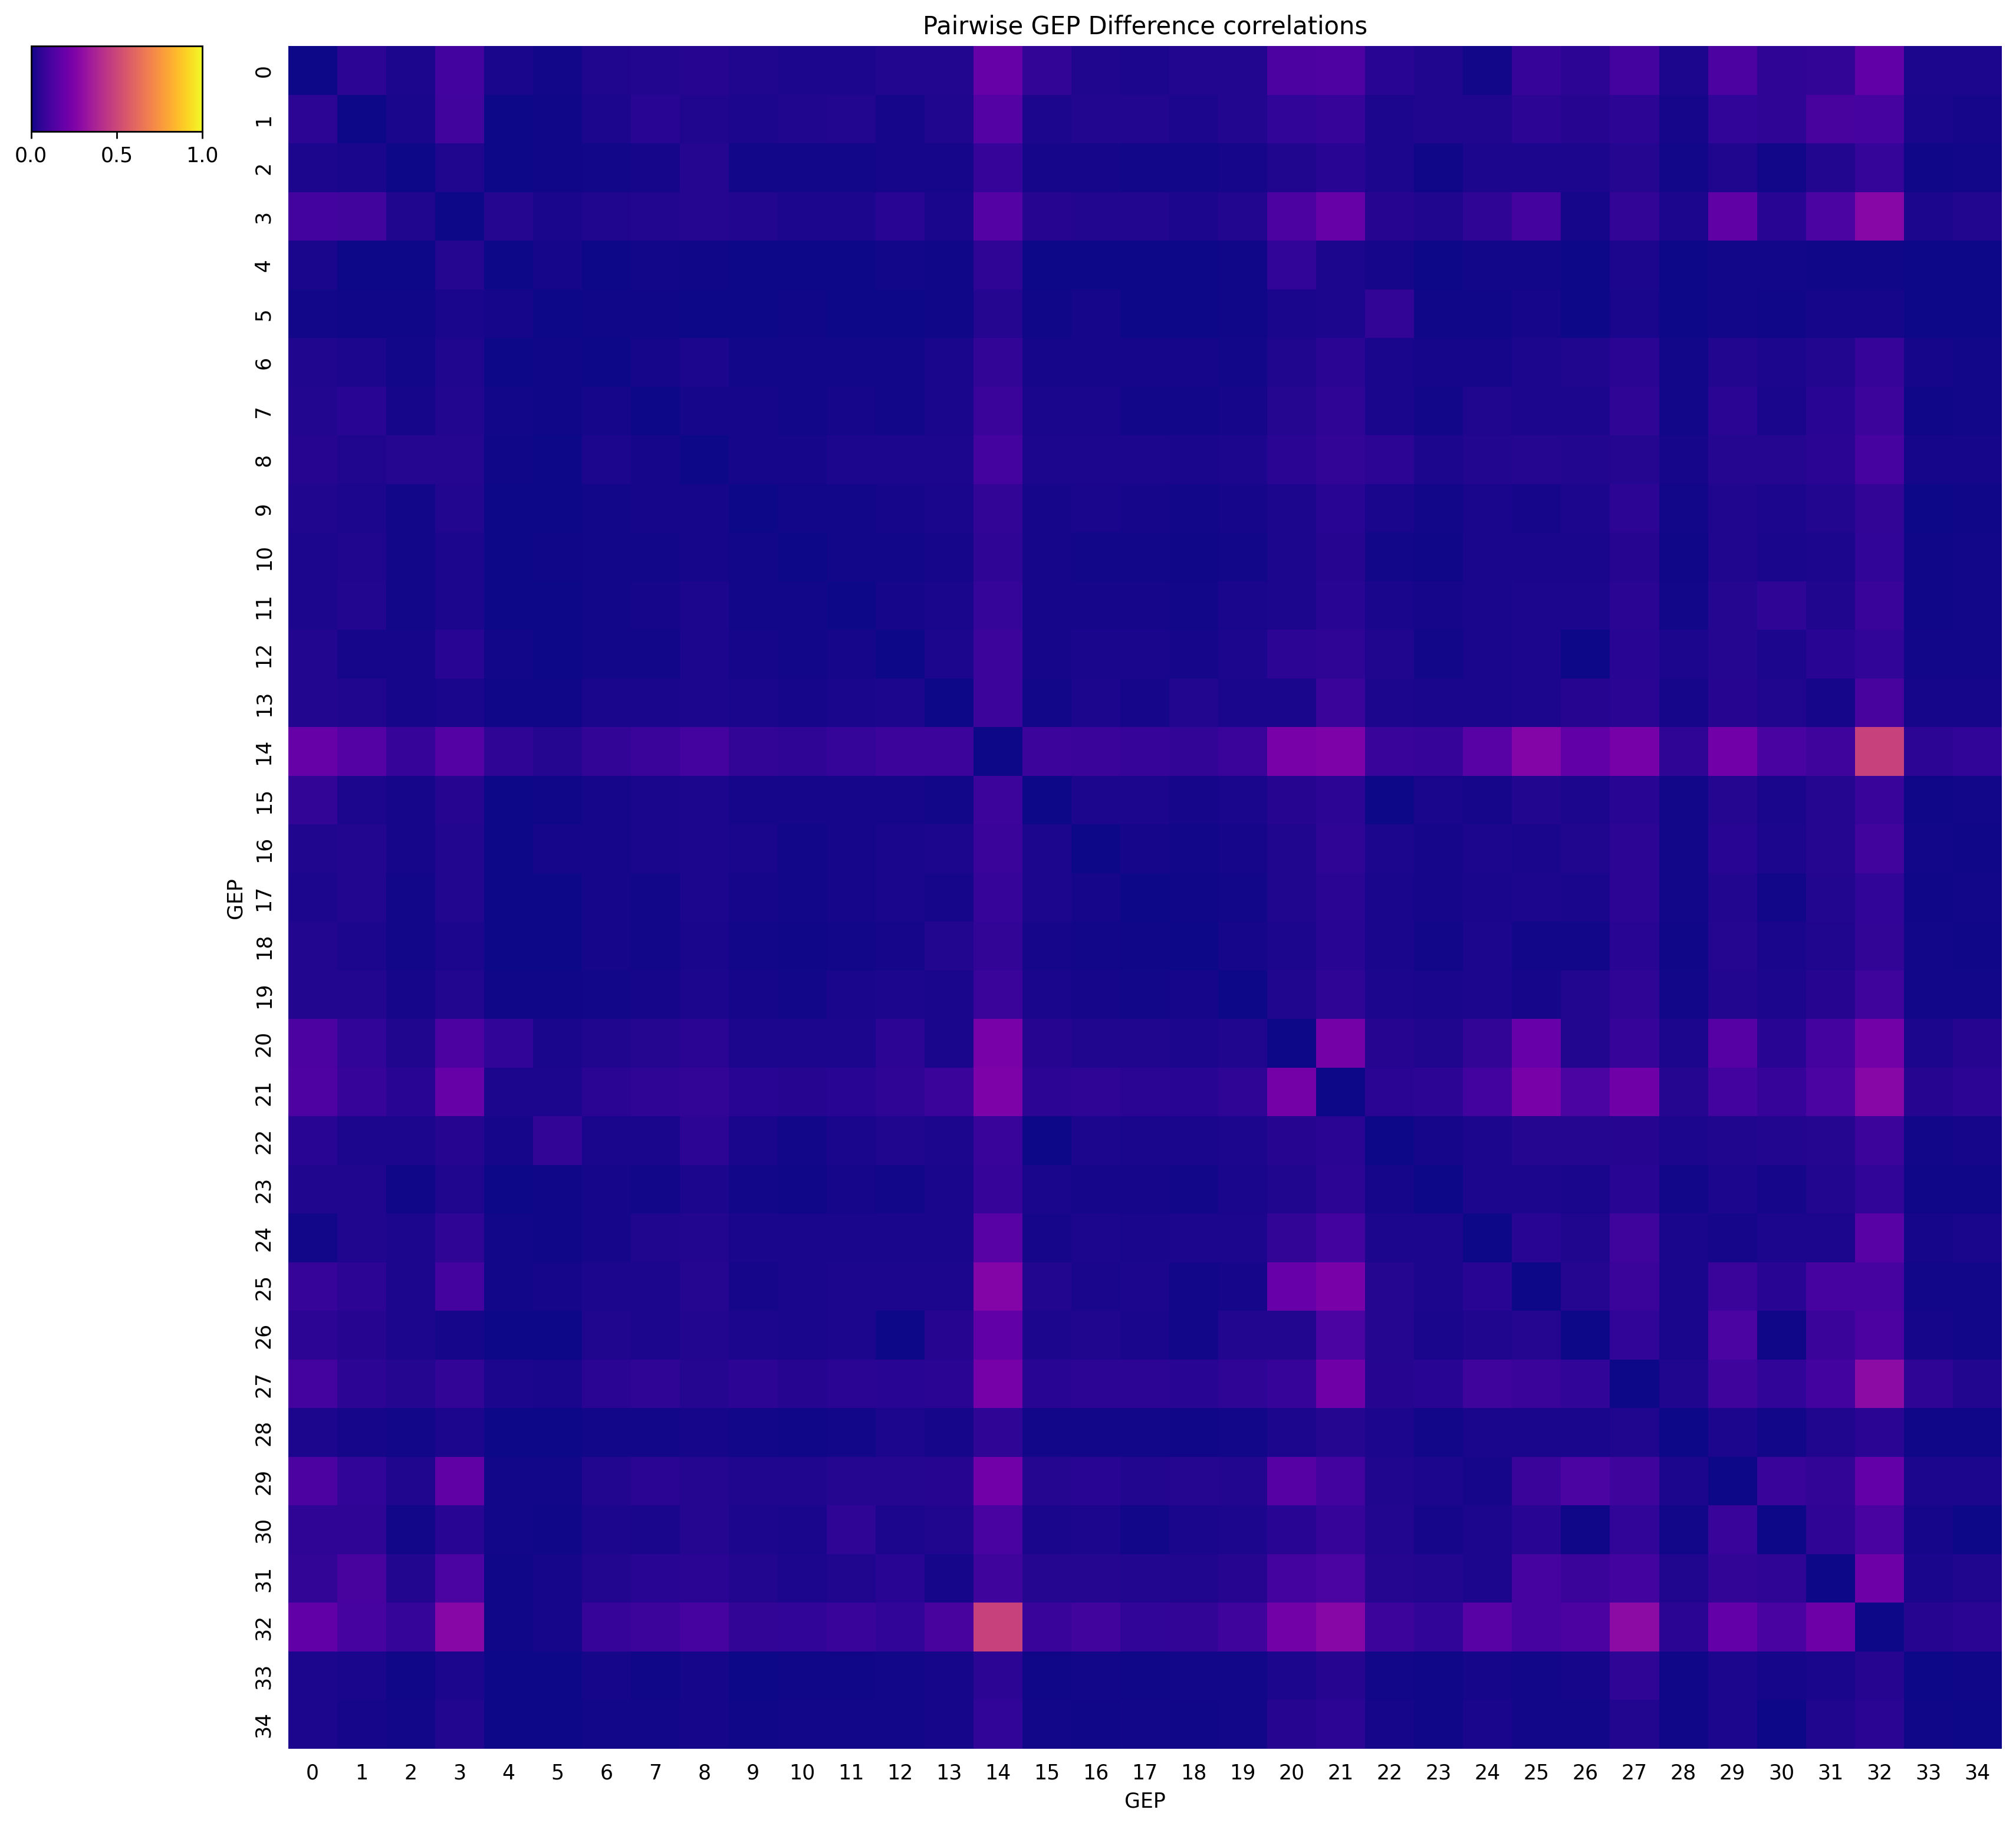

In [32]:
fig, ax = plt.subplots(dpi = 250, figsize = (15, 15))
sns.heatmap(corr_diff, vmin = 0, vmax = 1, cbar=False, cmap = 'plasma')
ax.set_xlabel('GEP')
ax.set_ylabel('GEP')
ax.set_title('Pairwise GEP Difference correlations')
ax.tick_params(left=False, bottom=False)
cax = ax.inset_axes([-.15, .95, 0.1, 0.05], transform=ax.transAxes)
fig.colorbar(ScalarMappable(norm=Normalize(vmin=0, vmax=1), 
                            cmap=sns.color_palette("plasma", as_cmap=True)),
             ax=ax, cax=cax, orientation='horizontal')